# Neural Networks

In [1]:
import numpy as np

In [2]:
class NN:

    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y        = y
        self.output   = np.zeros(self.y.shape)

    def feedforward(self, x):
        self.layer1 = self.sigmoid(np.dot(self.input, self.weights1))
        self.output = self.sigmoid(np.dot(self.layer1, self.weights2))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def relu(self, z):
        return max(0, z)

    def tanh(self, z):
        return np.tanh(z)

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def relu_derivative(self, z):
        z[z <= 0] = 0
        return z

    def tanh_derivative(self, z):
        return 1 - np.tanh(z)**2

    def backprob(self):
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * self.sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output * self.sigmoid_derivative(self.output), self.weights2.T) * self.sigmoid_derivative(self.layer1))))

        self.weights1 += d_weights1
        self.weights2 += d_weights2


# Task 1.2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [4]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

dataset = pd.read_csv(url)
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [7]:
mlp_classifier = MLPClassifier(max_iter=1000)
mlp_classifier.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [8]:
y_pred = mlp_classifier.predict(X_test)

print(y_pred[:15])
print(np.array(y_test[:15]))

print(f'Test accuracy: {mlp_classifier.score(X_test, y_test)}')
print(f'Train accuracy: {mlp_classifier.score(X_train, y_train)}')

['Setosa' 'Virginica' 'Setosa' 'Versicolor' 'Virginica' 'Virginica'
 'Versicolor' 'Versicolor' 'Virginica' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Setosa']
['Setosa' 'Virginica' 'Setosa' 'Versicolor' 'Virginica' 'Virginica'
 'Versicolor' 'Versicolor' 'Virginica' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Setosa']
Test accuracy: 0.9666666666666667
Train accuracy: 0.9916666666666667


## MLPRegressor

In [9]:
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'

dataset = pd.read_csv(url)
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [11]:
X = dataset.YearsExperience
y = dataset.Salary
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

Text(0, 0.5, 'Salary')

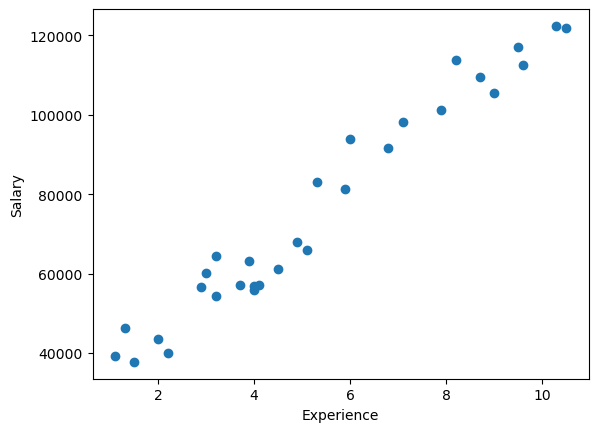

In [12]:
plt.plot(X, y, 'o')

plt.xlabel('Experience')
plt.ylabel('Salary')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [19]:
mlp_regressor = MLPRegressor(max_iter=20000)
mlp_regressor.fit(X_train.values.reshape(-1, 1), y_train.values)

C:\Users\polup\anaconda3\envs\AiAndBigDataCourse\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=20000)

In [27]:
y_pred = mlp_regressor.predict(X_test.values.reshape(-1, 1))

print(y_pred)
print(y_test.values.ravel())

[ 69639.50826653  58530.0761766  121853.83908916  81859.88356544
 129630.4415521   37422.15520575]
[ 67938.  63218. 112635.  93940. 122391.  43525.]


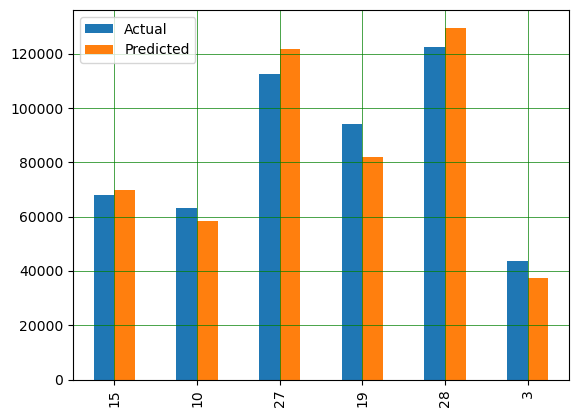

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

In [34]:
print(mlp_regressor.score(X_test.values.reshape(-1, 1), y_test))
print(mlp_regressor.score(X_train.values.reshape(-1, 1), y_train))

0.9268242554081676
0.919886586805911
